### Anomaly Detection

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo

In [4]:
# Load the dataset
air_quality = fetch_ucirepo(id=360)

In [5]:
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [6]:
df = air_quality.data.features


In [7]:
# Select the specific columns for anomaly detection
features = df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']] 
# these features are used to check air quality

In [8]:
# Check for missing values
features.isnull().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   NOx(GT)   9357 non-null   int64  
 3   NO2(GT)   9357 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 292.5 KB


In [10]:
# parameters for isolation forest
n_estimators = 100 # number of trees in the forest
contamination = 0.01 # proportion of outliers in the data
sample_size = 256 # number of samples to draw from the data to train each tree

In [11]:
# train the isolation forest model
model = IsolationForest(n_estimators=n_estimators, contamination=contamination, max_samples=sample_size, random_state=42)

model.fit(features)

# predict anomalies
anomaly_labels = model.predict(features)
# -1 for anomalies and 1 for normal data points

In [12]:
# create new column in the original dataframe to store anomaly labels
features['anomaly'] = anomaly_labels
features.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_16024\2421008379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['anomaly'] = anomaly_labels


,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [13]:
# Check balue counts of anomaly labels
features['anomaly'].value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

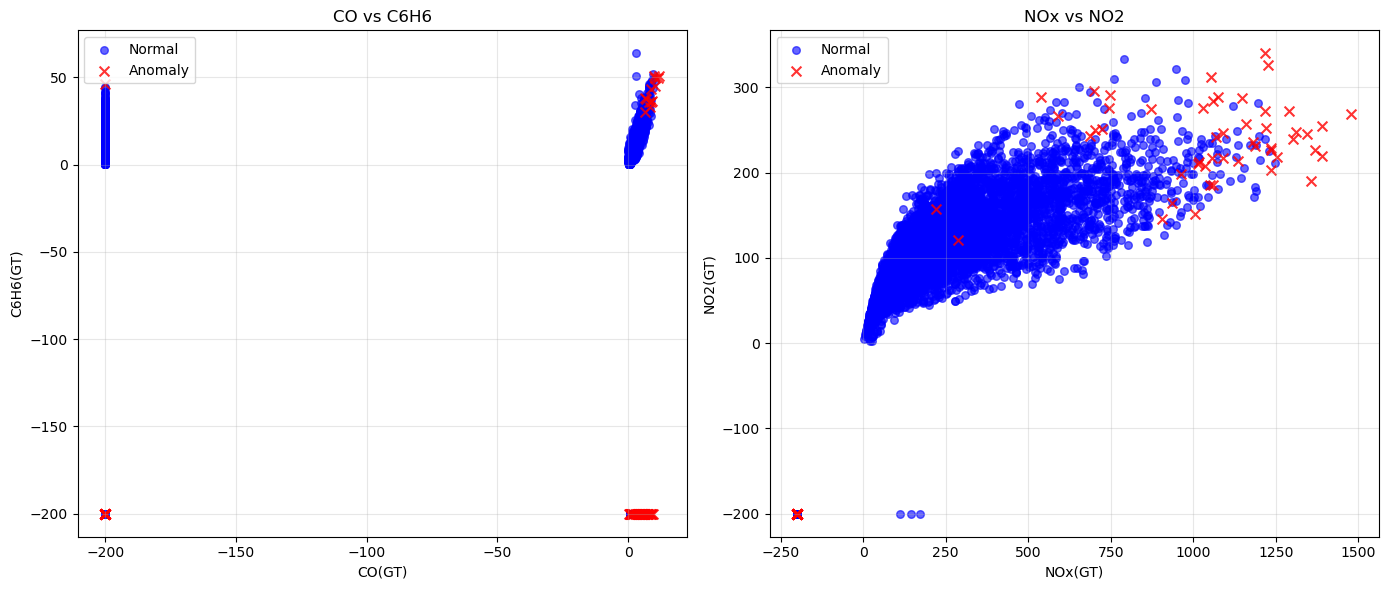

Normal data points : 9263
Anomalies detected : 94


In [14]:
# visualize anomalies usin scatter plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# plot normal instances
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

# plt.scatter(normal_data.index,normal['anomaly'],color='blue',label='normal',alpha=0.5)

# Plot 1 : CO vs C6H6
axes[0].scatter(normal['CO(GT)'],normal['C6H6(GT)'],color='blue',label='Normal',alpha=0.6,s=30)
axes[0].scatter(anomaly['CO(GT)'],anomaly['C6H6(GT)'],color='red',label='Anomaly',alpha=0.8,s=50,marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True,alpha=0.3)

# Plot 2 : NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50,marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Normal data points : {len(normal)}")
print(f"Anomalies detected : {len(anomaly)}")

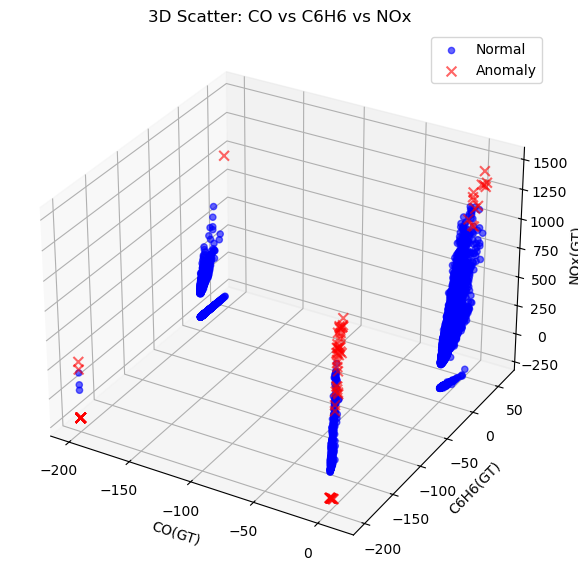

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

ax.scatter(normal['CO(GT)'], normal['C6H6(GT)'], normal['NOx(GT)'], color='blue', label='Normal', alpha=0.6)
ax.scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], anomaly['NOx(GT)'], color='red', label='Anomaly', alpha=0.6, s=50, marker='x')

ax.set_xlabel('CO(GT)')
ax.set_ylabel('C6H6(GT)')
ax.set_zlabel('NOx(GT)')
ax.set_title('3D Scatter: CO vs C6H6 vs NOx')
ax.legend()
plt.show()


In [16]:
import plotly.graph_objects as go
import numpy as np

# Separate normal and anomaly
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

fig = go.Figure()

# Normal points
fig.add_trace(go.Scatter3d(
    x=normal['CO(GT)'],
    y=normal['C6H6(GT)'],
    z=normal['NOx(GT)'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal['NO2(GT)'],       # 4th feature as color
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='NO2(GT)')
    ),
    hovertemplate=(
        'CO(GT): %{x}<br>' +
        'C6H6(GT): %{y}<br>' +
        'NOx(GT): %{z}<br>' +
        'NO2(GT): %{marker.color}<br>' +
        '<extra></extra>'
    )
))

# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly['CO(GT)'],
    y=anomaly['C6H6(GT)'],
    z=anomaly['NOx(GT)'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=10,                       # larger size to highlight anomalies
        color=anomaly['NO2(GT)'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    ),
    hovertemplate=(
        'CO(GT): %{x}<br>' +
        'C6H6(GT): %{y}<br>' +
        'NOx(GT): %{z}<br>' +
        'NO2(GT): %{marker.color}<br>' +
        '<extra></extra>'
    )
))

# Layout settings
fig.update_layout(
    title='4D Scatter Plot of Normal vs Anomaly (Color = NO2(GT))',
    scene=dict(
        xaxis_title='CO(GT)',
        yaxis_title='C6H6(GT)',
        zaxis_title='NOx(GT)'
    ),
    width=900,
    height=700,
    legend=dict(x=0.8, y=0.9)
)

fig.show()
